# **Model Product PAR Prediction**

## Load The Train Dataset To Train

In [1]:
import pandas as pd

Data_PAR = pd.read_csv('/kaggle/input/dataset-find-par-qty-coop/train_fulldata.csv')
Data_PAR

,pr_level1_key,pr_dpcode,iprcode,pack_size,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,1,3,213819,10,1007,4,316,4.0,0.0,4.0,6
1,1,5,229142,12,1024,4,321,3.0,0.0,3.0,6
2,1,2,170136,36,1006,11,365,3.0,0.0,3.0,6
3,1,1,214842,1,1012,3,365,0.0,0.0,0.0,6
4,1,2,182442,24,1046,10,263,17.0,0.0,17.0,17
...,...,...,...,...,...,...,...,...,...,...,...
325464,1,3,251129,12,1049,4,270,6.0,0.0,6.0,6
325465,1,8,247006,6,1014,4,180,1.0,0.0,1.0,6
325466,1,8,7438,12,1053,12,650,1.0,0.0,1.0,6
325467,1,9,204519,3,1051,4,658,3.0,0.0,3.0,6


## Data Preparation

In [2]:
#To remove the NA values
print("Total amount of data before removing missing values.:", len(Data_PAR))
Data_PAR = Data_PAR.dropna()
print("Total amount of data after removing missing values.:", len(Data_PAR))

Total amount of data before removing missing values.: 325469
Total amount of data after removing missing values.: 314835


In [3]:
# checking the number of missing values in the dataset
Data_PAR.isnull().sum()

pr_level1_key    0
pr_dpcode        0
iprcode          0
pack_size        0
brcode           0
parqty           0
sh_daysmin       0
sd_t_qty_30      0
on_promotion     0
Parqty_Cal       0
Parqty_Adj       0
dtype: int64

In [4]:
# Delete rows with duplicate values.
print("Total amount of data before deleting duplicate values :", len(Data_PAR))
Data_PAR = Data_PAR.drop_duplicates()
print("Total amount of data after deleting duplicate values :", len(Data_PAR))

Total amount of data before deleting duplicate values : 314835
Total amount of data after deleting duplicate values : 314835


## EDA (Exploratory data analysis)

In [5]:
# from ydata_profiling import ProfileReport

# pr_df = ProfileReport(Data_PAR)

# pr_df.to_file("report.html")

## Split The Data

In [6]:
Data_PAR

,pr_level1_key,pr_dpcode,iprcode,pack_size,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,1,3,213819,10,1007,4,316,4.0,0.0,4.0,6
1,1,5,229142,12,1024,4,321,3.0,0.0,3.0,6
2,1,2,170136,36,1006,11,365,3.0,0.0,3.0,6
3,1,1,214842,1,1012,3,365,0.0,0.0,0.0,6
4,1,2,182442,24,1046,10,263,17.0,0.0,17.0,17
...,...,...,...,...,...,...,...,...,...,...,...
325464,1,3,251129,12,1049,4,270,6.0,0.0,6.0,6
325465,1,8,247006,6,1014,4,180,1.0,0.0,1.0,6
325466,1,8,7438,12,1053,12,650,1.0,0.0,1.0,6
325467,1,9,204519,3,1051,4,658,3.0,0.0,3.0,6


In [7]:
#Splitting dataset to train and test
from sklearn.model_selection import train_test_split


X = Data_PAR.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1)  # features

y = Data_PAR[['Parqty_Cal']]  # target

# split to train 70% and temp set 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
  
# split temp set is validation 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Standardizing

In [8]:
# from sklearn.preprocessing import StandardScaler

# # make StandardScaler object
# scaler = StandardScaler()

# #  Standardizing data feature in data train
# X_train = scaler.fit_transform(X_train)

# #  Standardizing data feature in validation and test
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

## Find The Models

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
    # Add more models if needed
}

# Loop through each model
for model_name, model in models.items():
    param_grid = {}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.values.ravel())

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate on validation set
    y_val_pred = best_model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)

    # Evaluate on test set
    y_test_pred = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'{model_name} - Best Parameters: {best_params}')
    print(f'{model_name} - MSE on Validation Set: {mse_val}')
    print(f'{model_name} - MSE on Test Set: {mse_test}')
    print('-' * 30)

Linear Regression - Best Parameters: {}
Linear Regression - MSE on Validation Set: 52.286017925646256
Linear Regression - MSE on Test Set: 54.37128746154085
------------------------------
Random Forest - Best Parameters: {}
Random Forest - MSE on Validation Set: 4.958420645844363
Random Forest - MSE on Test Set: 29.25734614407318
------------------------------
Gradient Boosting - Best Parameters: {}
Gradient Boosting - MSE on Validation Set: 2.654850946646031
Gradient Boosting - MSE on Test Set: 12.239480328174645
------------------------------


## Train The Model Round 1

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model on the training set.
Model_RF = RandomForestRegressor(n_estimators=10, random_state=42)
Model_RF.fit(X_train, y_train.values.ravel())

# Adjudt Parameter on Validation Set to Test hyperparameter
Model_RF_2 = RandomForestRegressor(n_estimators=15, criterion='squared_error'
                                  , min_samples_split=2, random_state=42)
Model_RF_2.fit(X_val, y_val.values.ravel()) 

# Evaluate Performance on Test Set
y_pred = Model_RF_2.predict(X_test)

#  Evaluate Performance of the model
MSE_Train = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Train Set {MSE_Train}')

Mean Squared Error on Train Set 108.69310624561798


## Load The Test Dataset To Test

In [11]:
Data_PAR_test = pd.read_csv('/kaggle/input/dataset-find-par-qty-coop/test_fulldata.csv')

#Clean NA Value in Dataset
Data_PAR_test = Data_PAR_test.dropna()

Data_PAR_test

,pr_level1_key,pr_dpcode,iprcode,pack_size,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,1,5,259935,30,1044,3,450,1.0,1.25,1.0,8
1,2,28,143957,12,1026,6,75,0.0,0.00,0.0,3
2,2,23,236062,12,1022,6,30,21.0,0.00,7.0,7
3,1,2,221411,12,1050,2,389,0.0,0.00,0.0,6
4,1,14,228662,6,1024,4,658,2.0,1.25,3.0,8
...,...,...,...,...,...,...,...,...,...,...,...
139482,1,28,233583,14,1038,10,135,13.0,0.00,13.0,13
139483,2,21,257476,1,1051,3,700,0.0,0.00,0.0,3
139484,1,10,242854,12,1048,6,864,10.0,1.25,13.0,13
139485,1,2,32347,20,1039,30,212,41.0,0.00,41.0,41


## Split Test Dataset

In [12]:
# Split data into features (X_new) and target (y_new)

X_2 = Data_PAR_test.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1)  # features

y_2 = Data_PAR_test['Parqty_Cal']  # target

X_2.columns = X.columns

## Standardizing

In [13]:
# # Standardizing data feature on data x
# X_2 = scaler.fit_transform(X_2)

# # Standardizing data feature on data y
# #y_2 = scaler.transform(y_2)

## Evaluate Performance on Test DataSet

In [14]:
y_pred_2 = Model_RF_2.predict(X_2)

MSE_Test_2 = mean_squared_error(y_2, y_pred_2)


print(f'Mean Squared Error: {MSE_Test_2}')

Mean Squared Error: 42.08710917204814


## Varible Importances

In [15]:
# Saving feature names for later use
feature_list = list(Data_PAR_test.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1).columns)

In [16]:
# Get numerical feature importances
importances = list(Model_RF_2.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sd_t_qty_30          Importance: 0.9
Variable: sh_daysmin           Importance: 0.06
Variable: pr_dpcode            Importance: 0.01
Variable: brcode               Importance: 0.01
Variable: parqty               Importance: 0.01
Variable: on_promotion         Importance: 0.01
Variable: pr_level1_key        Importance: 0.0
Variable: iprcode              Importance: 0.0
Variable: pack_size            Importance: 0.0


## Make The Bar Chart

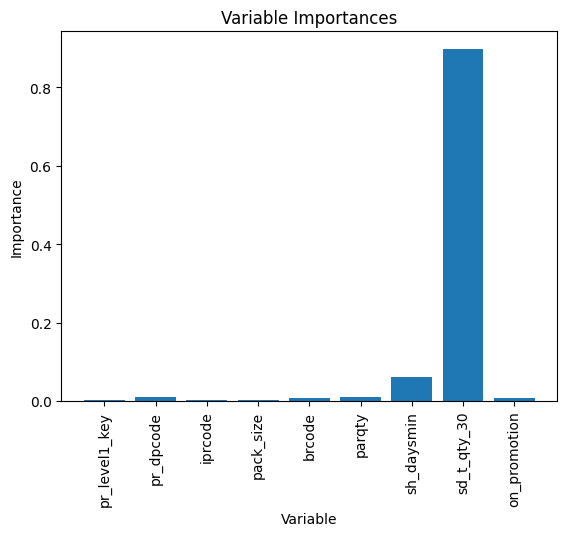

In [17]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## Eliminate Columns

In [18]:
feature_list_Eliminate = list(Data_PAR_test.drop(['pr_level1_key', 'iprcode','pack_size'], axis=1).columns)

## Find HyperParameter For Model 

In [19]:
# Check All Parameters in  RandomForestRegressor

new_model = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(new_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [20]:
# Define Rang to Random Search to find Hyperparameter

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = [1.0, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 6, 10],
 'max_features': [1.0, 'log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1, 2, 5],
 'n_estimators': [10, 57, 105, 152, 200]}


In [21]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
new_model_random = RandomizedSearchCV(estimator=new_model, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
new_model_random.fit(X_train, y_train.values.ravel());

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=105; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=105; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=105; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time= 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ut

In [22]:
# Check The Best Hyperparameter From Rang Random Search
new_model_random.best_params_

{'n_estimators': 57,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': 10,
 'bootstrap': True}

## Result Best Hyperparameter From Random Search 

In [23]:
# new_model_random_best_params ={'n_estimators': 300,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'log2',
#  'max_depth': 45,
#  'bootstrap': False}

## Evaluation Fuction

In [24]:
# Extract features and labels
target = Data_PAR_test['Parqty_Cal']
features = Data_PAR_test.drop(['Parqty_Cal', 'Parqty_Adj'], axis = 1)

In [25]:
# Convert to numpy arrays
import numpy as np

features = np.array(features)
target = np.array(target)

# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size = 0.25, random_state = 42)

## Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 2],
    'max_features': [1.0, 'log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [100, 200]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2, return_train_score=True)

In [27]:
# Fit the grid search to the data
grid_search.fit(train_features, train_target);

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  36.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.1s
[CV] END bootstrap=False, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=152; total time=  27.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  44.1s
[CV] END bootstrap=True, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=105; total time=   5.8s
[CV] END bootstrap=False, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total 

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/util

## Train The Model Round 2

In [28]:
#Splitting dataset to train and test

# Eliminate Useless Columns 
Data_PAR = Data_PAR[feature_list_Eliminate]

X_3 = Data_PAR.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1)  # features

y_3 = Data_PAR[['Parqty_Cal']] # target

# split data to train 70% and temp set 30%
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=42)

# split temp set to validation 15% and test 15%
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, random_state=42)

In [29]:
#Train The Models

Model_RF_3 = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf= 1
                                  , max_features=1.0, max_depth=None ,bootstrap= False
                                  , random_state=42)

Model_RF_3.fit(X_val_3, y_val_3.values.ravel())

# Evaluate Performance The Model on Test Set
y_pred_3 = Model_RF_3.predict(X_test_3)

# ประเมินประสิทธิภาพของโมเดล
MSE_Train_3 = mean_squared_error(y_test_3, y_pred_3)
print(f'Mean Squared Error on Test Set {MSE_Train_3}')

Mean Squared Error on Test Set 78.21748137890145


## Load The Train Data set To Train 

In [30]:
Data_PAR_test = Data_PAR_test[feature_list_Eliminate]

Data_PAR_test

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,5,1044,3,450,1.0,1.25,1.0,8
1,28,1026,6,75,0.0,0.00,0.0,3
2,23,1022,6,30,21.0,0.00,7.0,7
3,2,1050,2,389,0.0,0.00,0.0,6
4,14,1024,4,658,2.0,1.25,3.0,8
...,...,...,...,...,...,...,...,...
139482,28,1038,10,135,13.0,0.00,13.0,13
139483,21,1051,3,700,0.0,0.00,0.0,3
139484,10,1048,6,864,10.0,1.25,13.0,13
139485,2,1039,30,212,41.0,0.00,41.0,41


## Train Model on test Data set

In [31]:
# Split the new data into features (X_new) and target (y_new)
X_4 = Data_PAR_test.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1)  # features
y_4 = Data_PAR_test['Parqty_Cal']  # target

# Get the column order from the training set
column_order_4 = X_train_3.columns

# Reorder the columns in X_new
X_4 = X_4[column_order_4]
y_pred_4 = Model_RF_3.predict(X_4)

MSE_Test_4 = mean_squared_error(y_4, y_pred_4)
print(f'Mean Squared Error: {MSE_Test_4}')

Mean Squared Error: 25.255775506592553


## Measure Model Performance

In [32]:
#Find The Accuracy Value
Parqty_Cal_Pred = y_pred_4.round()

Diff = Data_PAR_test['Parqty_Cal'] - Parqty_Cal_Pred

count_correct = (Diff == 0).sum()

len_Data_All = len(Data_PAR_test)

accuracy = count_correct / len_Data_All

print('MSE Train Before Turning Hyperparameter : {:0.2f}'.format(MSE_Train))
print('MSE Train Before Turning Hyperparameter : {:0.2f}'.format(MSE_Train_3))
print('MSE Test Before Turning Hyperparameter : {:0.2f}'.format(MSE_Test_2))
print('MSE Test Before Turning Hyperparameter : {:0.2f}'.format(MSE_Test_4))
print('Improvement of MSE : {:0.2f}'.format(MSE_Train - MSE_Train_3))
print('Final Accuracy : {:0.2f}%.'.format(accuracy *100))

MSE Train Before Turning Hyperparameter : 108.69
MSE Train Before Turning Hyperparameter : 78.22
MSE Test Before Turning Hyperparameter : 42.09
MSE Test Before Turning Hyperparameter : 25.26
Improvement of MSE : 30.48
Final Accuracy : 99.00%.


## Save Output For Make To New File 

In [33]:
Data_PAR_test

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,5,1044,3,450,1.0,1.25,1.0,8
1,28,1026,6,75,0.0,0.00,0.0,3
2,23,1022,6,30,21.0,0.00,7.0,7
3,2,1050,2,389,0.0,0.00,0.0,6
4,14,1024,4,658,2.0,1.25,3.0,8
...,...,...,...,...,...,...,...,...
139482,28,1038,10,135,13.0,0.00,13.0,13
139483,21,1051,3,700,0.0,0.00,0.0,3
139484,10,1048,6,864,10.0,1.25,13.0,13
139485,2,1039,30,212,41.0,0.00,41.0,41


## update Data For train Model 2 

In [34]:
Data_PAR_test_For_Col2 = Data_PAR_test
Data_PAR_test_For_Col2.loc[:, 'Parqty_Cal'] = y_pred_4.round()
Data_PAR_test_For_Col2

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,5,1044,3,450,1.0,1.25,1.0,8
1,28,1026,6,75,0.0,0.00,0.0,3
2,23,1022,6,30,21.0,0.00,7.0,7
3,2,1050,2,389,0.0,0.00,0.0,6
4,14,1024,4,658,2.0,1.25,3.0,8
...,...,...,...,...,...,...,...,...
139482,28,1038,10,135,13.0,0.00,13.0,13
139483,21,1051,3,700,0.0,0.00,0.0,3
139484,10,1048,6,864,10.0,1.25,13.0,13
139485,2,1039,30,212,41.0,0.00,41.0,41


In [35]:
# import numpy as np
# output = pd.DataFrame({"pr_dpcode": Data_PAR_test["pr_dpcode"],
#                         "brcode": Data_PAR_test["brcode"],
#                         "parqty": Data_PAR_test["parqty"],
#                         "sh_daysmin": Data_PAR_test["sh_daysmin"],
#                         "sd_t_qty_30": Data_PAR_test["sd_t_qty_30"],
#                         "on_promotion": Data_PAR_test["on_promotion"],
#                         "Parqty_Cal": y_pred_4.round(),
#                         "Parqty_Adj": Data_PAR_test["Parqty_Adj"]});

In [36]:
Data_PAR

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,3,1007,4,316,4.0,0.0,4.0,6
1,5,1024,4,321,3.0,0.0,3.0,6
2,2,1006,11,365,3.0,0.0,3.0,6
3,1,1012,3,365,0.0,0.0,0.0,6
4,2,1046,10,263,17.0,0.0,17.0,17
...,...,...,...,...,...,...,...,...
325464,3,1049,4,270,6.0,0.0,6.0,6
325465,8,1014,4,180,1.0,0.0,1.0,6
325466,8,1053,12,650,1.0,0.0,1.0,6
325467,9,1051,4,658,3.0,0.0,3.0,6


## update Data For train Model 2 

In [37]:
Data_PAR_For_Col2 = Data_PAR
Data_PAR_For_Col2.loc[:, 'Parqty_Cal'] = Model_RF_3.predict(Data_PAR.drop(['Parqty_Cal', 'Parqty_Adj'], axis=1))
Data_PAR_For_Col2

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,3,1007,4,316,4.0,0.0,4.0,6
1,5,1024,4,321,3.0,0.0,3.0,6
2,2,1006,11,365,3.0,0.0,3.0,6
3,1,1012,3,365,0.0,0.0,0.0,6
4,2,1046,10,263,17.0,0.0,17.0,17
...,...,...,...,...,...,...,...,...
325464,3,1049,4,270,6.0,0.0,6.0,6
325465,8,1014,4,180,1.0,0.0,1.0,6
325466,8,1053,12,650,1.0,0.0,1.0,6
325467,9,1051,4,658,3.0,0.0,3.0,6


In [38]:
#Save Data To CSV File 

Data_PAR_test.to_csv('Data_Par_Output1.csv', index=False)

## Save Model 1

In [39]:
import pickle
with open('RF_Model_Product_PAR_1.pkl', 'wb') as file:
    pickle.dump(Model_RF_3, file)

# Find The Target Column 2

In [40]:
# Load Train Data Set
train_data_5 = Data_PAR_For_Col2

train_data_5

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,3,1007,4,316,4.0,0.0,4.0,6
1,5,1024,4,321,3.0,0.0,3.0,6
2,2,1006,11,365,3.0,0.0,3.0,6
3,1,1012,3,365,0.0,0.0,0.0,6
4,2,1046,10,263,17.0,0.0,17.0,17
...,...,...,...,...,...,...,...,...
325464,3,1049,4,270,6.0,0.0,6.0,6
325465,8,1014,4,180,1.0,0.0,1.0,6
325466,8,1053,12,650,1.0,0.0,1.0,6
325467,9,1051,4,658,3.0,0.0,3.0,6


## Data Preparation

In [41]:
# To Remove NA Value
print("Total amount of data before removing missing values.:", len(train_data_5))
train_data_5 = train_data_5.dropna()
print("Total amount of data after removing missing values.:", len(train_data_5))

Total amount of data before removing missing values.: 314835
Total amount of data after removing missing values.: 314835


## Train The Model On Train Data Set

In [42]:
#Splitting dataset to train and test

X_5 = train_data_5.drop(['Parqty_Adj'], axis=1) # features 

y_5 = train_data_5[['Parqty_Adj']] # target

# แบ่งข้อมูลเป็น train 70% และ temp set 30%
X_train_5, X_temp_5, y_train_5, y_temp_5 = train_test_split(X_5, y_5, test_size=0.3, random_state=42)

# แบ่ง temp set เป็น validation 15% และ test 15%
X_val_5, X_test_5, y_val_5, y_test_5 = train_test_split(X_temp_5, y_temp_5, test_size=0.5, random_state=42)


In [43]:
#Train The Model 2
new_model_5 = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf= 1
                                  , max_features=1.0, max_depth=None ,bootstrap= False
                                  , random_state=42)
new_model_5.fit(X_val_5, y_val_5.values.ravel())

# ประเมินประสิทธิภาพบนชุดทดสอบ
y_pred_5 = new_model_5.predict(X_test_5)

# ประเมินประสิทธิภาพของโมเดล
MSE_Train_5 = mean_squared_error(y_test_5, y_pred_5)
print(f'Mean Squared Error on Train Set : {MSE_Train_5}')

Mean Squared Error on Train Set : 78.32635301203086


## Load The Test Dataset To Test

In [44]:
test_data_6 = Data_PAR_test_For_Col2

test_data_6 = test_data_6.dropna()

test_data_6

,pr_dpcode,brcode,parqty,sh_daysmin,sd_t_qty_30,on_promotion,Parqty_Cal,Parqty_Adj
0,5,1044,3,450,1.0,1.25,1.0,8
1,28,1026,6,75,0.0,0.00,0.0,3
2,23,1022,6,30,21.0,0.00,7.0,7
3,2,1050,2,389,0.0,0.00,0.0,6
4,14,1024,4,658,2.0,1.25,3.0,8
...,...,...,...,...,...,...,...,...
139482,28,1038,10,135,13.0,0.00,13.0,13
139483,21,1051,3,700,0.0,0.00,0.0,3
139484,10,1048,6,864,10.0,1.25,13.0,13
139485,2,1039,30,212,41.0,0.00,41.0,41


In [45]:
# Split the new data into features (X_new) and target (y_new)
X_new_6 = test_data_6.drop(['Parqty_Adj'], axis=1)  # features
y_new_6 = test_data_6['Parqty_Adj']  # target


# Reorder the columns in X_new
y_pred_new_6 = new_model_5.predict(X_new_6)

MSE_Test_6 = mean_squared_error(y_new_6, y_pred_new_6)
print(f'Mean Squared Error: {MSE_Test_6}')

Mean Squared Error: 33.14255096544237


In [46]:
test_data_6['Parqty_Adj_predict'] = y_pred_new_6.round()

In [47]:
test_data_6["Diff"] = test_data_6['Parqty_Adj'] - test_data_6['Parqty_Adj_predict']

len_Data_correct = len(test_data_6[(test_data_6["Diff"] == 0)])
len_Data_All = len(test_data_6)

accuracy_Model2 = len_Data_correct / len_Data_All

print('ความแม่นยำของโมเดลในการหา Parqty_Adj : {:0.2f}%.'.format(accuracy_Model2 *100))

ความแม่นยำของโมเดลในการหา Parqty_Adj : 96.32%.


# Measure Model

In [48]:
print('MSE Train Data Set : {:0.2f}'.format(MSE_Train_5))
print('MSE Test Data Set : {:0.2f}'.format(MSE_Test_6))

print('Final Accuracy : {:0.2f}%.'.format(accuracy_Model2 *100))

MSE Train Data Set : 78.33
MSE Test Data Set : 33.14
Final Accuracy : 96.32%.


## Save Output2 For Make To New File 2

In [49]:
#Save Data To CSV File 
test_data_6 = test_data_6.drop(['Diff'], axis=1)
test_data_6.to_csv('Data_Par_Output2.csv', index=False)

## Save Model 2

In [50]:
import pickle
with open('RF_Model_Product_PAR_2.pkl', 'wb') as file:
    pickle.dump(new_model_5, file)